In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import sys
import sklearn
import io
import random
import time
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing

In [83]:
data = pd.read_csv('data_ig.csv')
#data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,3,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,2,45,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,2,23,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,2,23,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [84]:
# # pisahkan fitur yang tidak memiliki tipe numerik

# # protocol_type
# protocol_type_columns=['protocol_type']
# protocol_type_values = data[protocol_type_columns]

# # service
# service_columns=['service']
# service_values = data[service_columns]

# # flag
# flag_columns=['flag']
# flag_values = data[flag_columns]

In [85]:
# # beri kode unique untuk setiap jenis data yang terdapat pada fitur

# # protocol_type
# unique_protocol = sorted(data.protocol_type.unique())
# string1 = 'protocol_type_'
# unique_protocol2 = [string1 + x for x in unique_protocol]
# print(unique_protocol2)

# # isi secara bersamaan
# dumcols_protocol_type = unique_protocol2

# # service
# unique_service = sorted(data.service.unique())
# string2 = 'service_'
# unique_service2 = [string2 + x for x in unique_service]
# print(unique_service2)

# dumcols_service = unique_service2

# # flag
# unique_flag = sorted(data.flag.unique())
# string3 = 'flag_'
# unique_flag2 = [string3 + x for x in unique_flag]
# print(unique_flag2)

# dumcols_flag = unique_flag2

In [86]:
# # konversi fitur katogorial menjadi numerik

# # protocol_type
# protocol_type_values_enc = protocol_type_values.apply(LabelEncoder().fit_transform)

# # service
# service_values_enc = service_values.apply(LabelEncoder().fit_transform)

# # flag
# flag_values_enc = flag_values.apply(LabelEncoder().fit_transform)

In [87]:
# # gabungkan kembali fitur yang sudah dikonversi kedalam dataset

# # protocol_type
# data['protocol_type'] = protocol_type_values_enc

# # service
# data['service'] = service_values_enc

# # flag
# data['flag'] = flag_values_enc

In [88]:
# pastikan kembali dataset
print(data)

       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              2       20     9        491          0     0   
1             0              3       41     9        146          0     0   
2             0              2       45     5          0          0     0   
3             0              2       23     9        232       8153     0   
4             0              2       23     9        199        420     0   
5             0              2       45     2          0          0     0   
6             0              2       45     5          0          0     0   
7             0              2       45     5          0          0     0   
8             0              2       47     5          0          0     0   
9             0              2       45     5          0          0     0   
10            0              2       45     2          0          0     0   
11            0              2       45     5          0          0     0   

In [89]:
# konversi label, 0 untuk normal dan 1 untuk serangan

label_data = data['label']

# ubah kolom label
new_label_data = label_data.replace({'normal' : 0, 'back' : 1, 'land' : 1, 'pod' : 1, 'neptune' : 1, 'smurf' : 1})
# tambahkan kolom label baru kedalam dataet
data['label'] = new_label_data

In [90]:
print(data)

       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              2       20     9        491          0     0   
1             0              3       41     9        146          0     0   
2             0              2       45     5          0          0     0   
3             0              2       23     9        232       8153     0   
4             0              2       23     9        199        420     0   
5             0              2       45     2          0          0     0   
6             0              2       45     5          0          0     0   
7             0              2       45     5          0          0     0   
8             0              2       47     5          0          0     0   
9             0              2       45     5          0          0     0   
10            0              2       45     2          0          0     0   
11            0              2       45     5          0          0     0   

In [91]:
# tandai fitur dan label dataset

fitur = data.drop('label', axis = 1)
target = data['label']
fitur.shape, target.shape

((40000, 41), (40000,))

In [92]:
# bagi dataset menjadi data training dan data testing, 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size = 0.2, random_state = 0)

In [93]:
# tentukan threshold untuk memunculkan target yang ingin ditampilkan

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [94]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [95]:
X_train_T.duplicated().sum()

0

In [96]:
duplicated_features = X_train_T.duplicated()

In [97]:
# features_to_keep = [not index for index in duplicated_features]
# X_train_unique = X_train_T[features_to_keep].T
# X_test_unique = X_test_T[features_to_keep].T
# X_train_unique.shape, X_test_unique.shape

In [98]:
# masukkan fungsi untuk menghitung entropy
mi = mutual_info_classif(X_train, y_train) 
len(mi)

41

In [99]:
mi = pd.Series(mi)
mi.index = X_train.columns

In [100]:
mi.sort_values(ascending=False, inplace = True)

In [101]:
# tampilkan entropy yang dihasilkan oleh masing - masing fitur
mi

src_bytes                      0.594335
service                        0.467795
dst_bytes                      0.460298
diff_srv_rate                  0.403451
same_srv_rate                  0.383803
flag                           0.375944
count                          0.370305
dst_host_srv_serror_rate       0.322255
dst_host_diff_srv_rate         0.314277
dst_host_serror_rate           0.314159
srv_serror_rate                0.308831
serror_rate                    0.306131
dst_host_same_srv_rate         0.300153
dst_host_srv_count             0.293089
logged_in                      0.269388
dst_host_srv_diff_host_rate    0.188294
dst_host_count                 0.152122
dst_host_same_src_port_rate    0.124786
srv_count                      0.122932
srv_diff_host_rate             0.120552
protocol_type                  0.098174
duration                       0.041750
dst_host_srv_rerror_rate       0.038800
dst_host_rerror_rate           0.028178
srv_rerror_rate                0.019175


In [102]:
# mi = pd.Series(mi)
# mi.index = X_train.columns

In [103]:
# mi.sort_values(ascending=False, inplace = True)

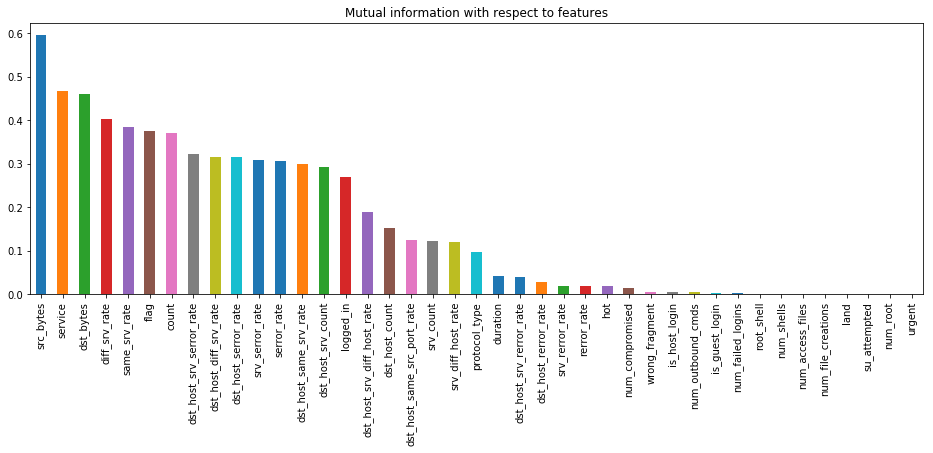

In [104]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()